In [1]:
import pandas as pd
import numpy as np
from sklearn import cross_validation, preprocessing, neighbors
from collections import Counter
from math import sqrt
import matplotlib.pyplot as plt
import random

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
breast_cancer = pd.read_excel('C:/Users/HP/breast-cancer-wisconsin.xlsx')
breast_cancer.replace('?', -99999, inplace=True)
breast_cancer.head()

,Id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# ID doesnt contribute to cancer in any way
# using ID decreases accuracy by 30 %
breast_cancer.drop('Id',1, inplace=True)

X = np.array(breast_cancer.drop('Class',1))
y = np.array(breast_cancer['Class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf=neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train )

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9785714285714285


In [4]:
example_test=np.array([[10,1,1,1,5,1,6,1,1], [10,1,1,10,5,1,6,10,1], [10,1,5,1,5,1,6,10,1]])
example_test = example_test.reshape(3,-1)
clf.predict(example_test)

array([2, 4, 4], dtype=int64)

In [5]:
#KNN

[[<matplotlib.collections.PathCollection at 0x17dbe86e10>,

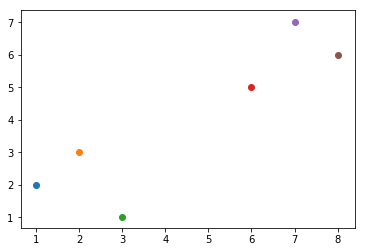

In [6]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features=[5,7]

[[plt.scatter(ii[0],ii[1]) for ii in dataset[i]] for i in dataset]

In [46]:
def k_nearest_neighbors(data, predict, k=25):
    if len(data) >= k:
        warnings.warn('K is set to value less than total voting groups.')
    distances = []
    for group in data:
        for features in data[group]:
            eucledian_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([eucledian_distance, group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence


breast_cancer_full_data = breast_cancer.astype('float').values.tolist()
random.shuffle(breast_cancer_full_data)
test_size=0.4
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = breast_cancer_full_data[:-int(len(breast_cancer_full_data)*test_size)]
test_data = breast_cancer_full_data[-int(len(breast_cancer_full_data)*test_size):]


for i in train_data:
    train_set[i[-1]].append(i[:-1]) # last value benign or malignine
    
for i in test_data:    
    test_set[i[-1]].append(i[:-1])
    
correct=0
total=0
for group in test_set:
    for data in test_set[group]:
        vote, conf = k_nearest_neighbors(train_set, data, k=5)
        if group==vote:
            correct +=1
        total+=1
        
print('Accuracy', correct/total)        

Accuracy 0.967741935483871


In [21]:
# Comparison of our algorithm with sklearn

In [47]:
for i in range(25):
    # ID doesnt contribute to cancer in any way
    # using ID decreases accuracy by 30 %
    accuracies=[]
    X = np.array(breast_cancer.drop('Class',1))
    y = np.array(breast_cancer['Class'])

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

    clf=neighbors.KNeighborsClassifier(n_jobs=1)
    clf.fit(X_train, y_train )

    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)
    
print((sum(accuracies)/len(accuracies)))

0.9571428571428572


In [48]:
# The sklearn model is much faster than our model